🌍 Detected Location: Mumbai, Maharashtra, IN
Predicted Crop: Rice
Estimated Yield: 171.06760000000006 metric tons per hectare


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


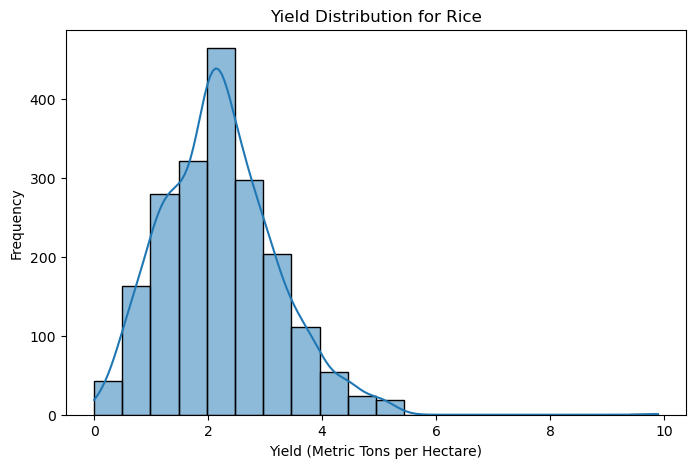

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


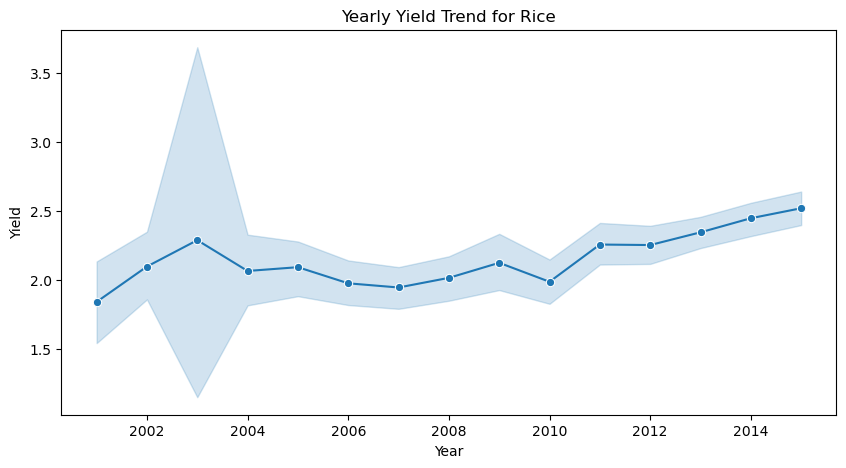

In [6]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
def importdata():
    data = pd.read_csv("projectDataset (1).csv")
    return data

# Train Regression Model for Yield Prediction
def train_yield_predictor(data):
    X = data[['SO2', 'NO2', 'RSPM', 'SPM', 'Area']]
    Y = data['Yield']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    
    model = RandomForestRegressor(n_estimators=100, random_state=100)
    model.fit(X_train, y_train)
    return model

# Get user location
def get_location_from_ip():
    try:
        response = requests.get("https://ipinfo.io/json")
        data = response.json()
        return data.get("city", "Unknown"), data.get("region", "Unknown"), data.get("country", "Unknown")
    except:
        return "Unknown", "Unknown", "Unknown"

# Predict yield using the already predicted crop
def predict_yield_for_crop(yield_model, data, predicted_crop):
    crop_data = data[data['Crop'] == predicted_crop]
    
    if not crop_data.empty:
        predicted_yield = yield_model.predict(crop_data[['SO2', 'NO2', 'RSPM', 'SPM', 'Area']].mean().values.reshape(1, -1))[0]
    else:
        predicted_yield = "No yield data available"
    
    print(f"Predicted Crop: {predicted_crop}")
    print(f"Estimated Yield: {predicted_yield} metric tons per hectare")
    
    return predicted_yield, crop_data

# Perform EDA for the predicted crop
def perform_eda(crop_data, predicted_crop):
    if crop_data.empty:
        print("No data available for EDA.")
        return
    
    plt.figure(figsize=(8, 5))
    sns.histplot(crop_data['Yield'], bins=20, kde=True)
    plt.title(f'Yield Distribution for {predicted_crop}')
    plt.xlabel('Yield (Metric Tons per Hectare)')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Year', y='Yield', data=crop_data, marker='o')
    plt.title(f'Yearly Yield Trend for {predicted_crop}')
    plt.xlabel('Year')
    plt.ylabel('Yield')
    plt.show()

def main(predicted_crop):
    data = importdata()
    yield_predictor = train_yield_predictor(data)
    
    city, state, country = get_location_from_ip()
    print(f"🌍 Detected Location: {city}, {state}, {country}")
    
    predicted_yield, crop_data = predict_yield_for_crop(yield_predictor, data, predicted_crop)
    perform_eda(crop_data, predicted_crop)

if __name__ == "__main__":
    predicted_crop = "Rice"  # Replace with actual predicted crop from DecisionTree model
    main(predicted_crop)
